Text(0, 0.5, 'y coordinates (m)')

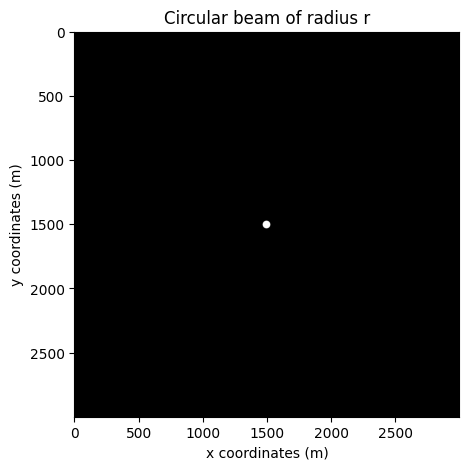

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftfreq, fftshift, ifftshift
import math

wvl = 200e-9 # wavelength
f = 10 # distance
pix_size = 1e-5 # pixel size
img_size = 1e-3 # image size
num_pixels = 3000 # number of pixels

x = np.linspace(-img_size/2, img_size/2, num_pixels) # spatial grid size
xv, yv = np.meshgrid(x,x)

# defines object to be Gaussian beam
# un-comment this, and comment next part to see results

#u_in = np.exp(-2*(xv**2 + yv**2)/(img_size/120)**2)

# defines object to be perfect circle beam with radius r
r = 10e-6
u_in = (xv**2 < r**2 - yv**2)
u_in = u_in.astype(float)

# plotting the object
plt.figure(figsize = (5,5))
plt.imshow(u_in, cmap = 'gray')
plt.title("Circular beam of radius r")
plt.xlabel("x coordinates (m)")
plt.ylabel("y coordinates (m)")


Text(0, 0.5, 'Intensity')

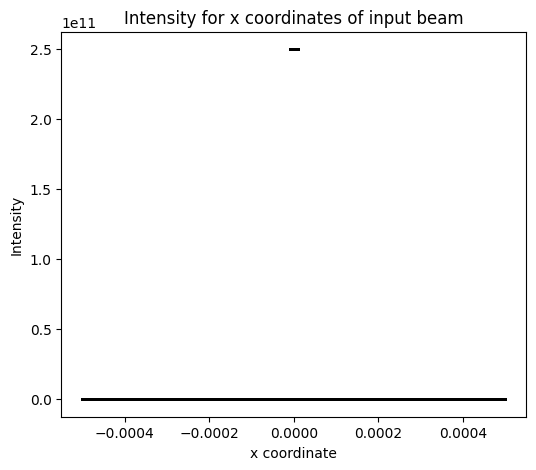

In [2]:
I1 = (1/(wvl*f))**2*np.abs(u_in)**2 # calculating intensity using formula described in notes below
plt.figure(figsize=(6,5))
plt.plot(xv, I1,'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity for x coordinates of input beam")
plt.xlabel("x coordinate")
plt.ylabel("Intensity")

Text(0, 0.5, 'y coordinates (mm)')

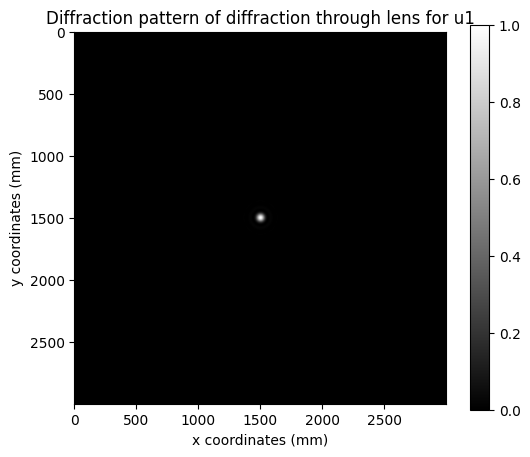

In [3]:
# plotting the intensity for u1

u1_fft = fft2(u_in) 
u1 = fftshift(u1_fft) # Fourier transforming it and moving frequencies into suitable region
u1  = ifftshift(u1)

I1 = (1/(wvl*f))**2*np.abs(u1)**2 # calculating intensity using formula described in notes below
I1_normalised = (I1 - np.min(I1))/(np.max(I1) - np.min(I1))
I1_normalised = fftshift(I1_normalised)

plt.figure(figsize=(6,5))
plt.imshow(I1_normalised, cmap='grey') # plotting intensity

plt.clim(0, 1) # sets limit for colorbar
plt.colorbar()

plt.title("Diffraction pattern of diffraction through lens for u1")
plt.xlabel("x coordinates (mm)")
plt.ylabel("y coordinates (mm)")



Text(0, 0.5, 'Intensity')

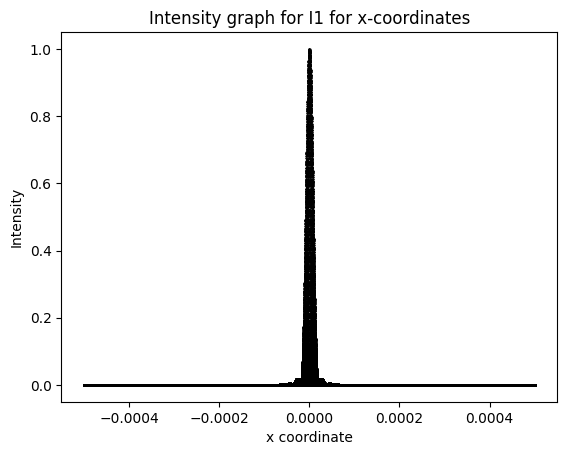

In [4]:
# plotting intensity graph for x and y
plt.plot(xv, I1_normalised,'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity graph for I1 for x-coordinates")
plt.xlabel("x coordinate")
plt.ylabel("Intensity")

Text(0, 0.5, 'Intensity')

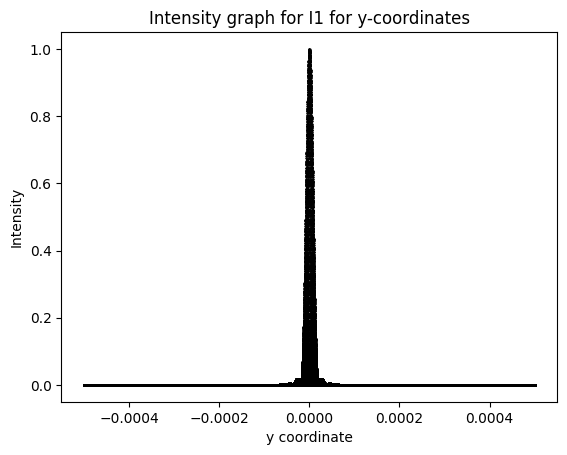

In [5]:
plt.plot(yv, I1_normalised,'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity graph for I1 for y-coordinates")
plt.xlabel("y coordinate")
plt.ylabel("Intensity")

In [19]:
# applying phase mask

# t_lens(r) = A exp (-i pi r^2/(lambda * f)) t_ap(r)

A = 10*xv + 5*yv
P = u1
#phase_mask = A * np.exp(-1j * np.pi * r**2 / (wvl * f)) # at focal point f
phase_mask = np.zeros((num_pixels, num_pixels))
coords = [(1475, 1475), (1525, 1525)]
radius = 100
for position in coords:
    x, y = position
    for i in range(max(0, x - radius), min(num_pixels, x + radius + 1)):
        for j in range(max(0, y - radius), min(num_pixels, y + radius + 1)):
            distance = np.sqrt((i - x)**2 + (j - y)**2)
            if distance <= radius:  # If within the radius, apply phase shift
                phase_mask[i, j] = np.pi


u1 = np.exp(-1j*np.pi*phase_mask)*u1

Text(0, 0.5, 'y coordinates (mm)')

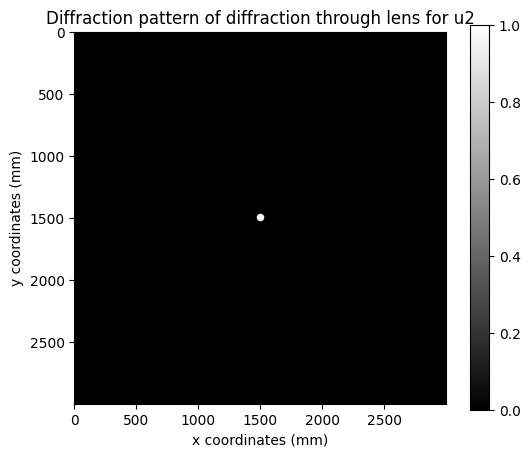

In [20]:
# propagating through second lens
u_out = u1

u2_fft = ifft2(u_out)
u2 = fftshift(u2_fft)

#u2 = u2.astype(float)

I2 = (1/(wvl*f))**2*np.abs(u2)**2
I2 = np.abs(u2)
I2_normalised = (I2 - np.min(I2))/(np.max(I2) - np.min(I2))
I2_normalised = fftshift(I2_normalised)
# normalising function


plt.figure(figsize=(6,5))
plt.imshow(I2_normalised, cmap='gray')
plt.clim(0, 1)
plt.colorbar()
plt.title("Diffraction pattern of diffraction through lens for u2")
plt.xlabel("x coordinates (mm)")
plt.ylabel("y coordinates (mm)")

Text(0, 0.5, 'y coordinates (mm)')

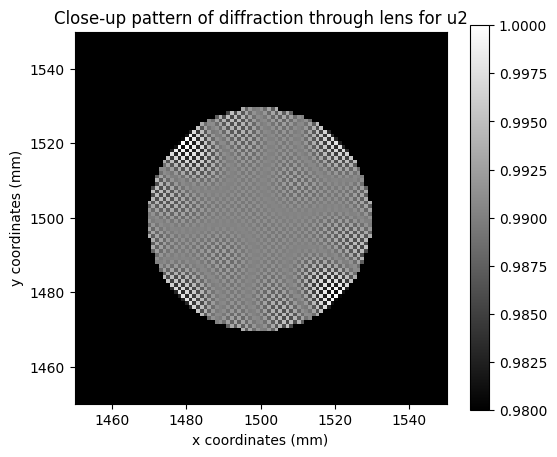

In [21]:
plt.figure(figsize=(6,5))
plt.xlim(1450, 1550)
plt.ylim(1450, 1550)
plt.imshow(I2_normalised, cmap='gray')
plt.clim(0.98, 1)
plt.colorbar()
plt.title("Close-up pattern of diffraction through lens for u2")
plt.xlabel("x coordinates (mm)")
plt.ylabel("y coordinates (mm)")

(-5e-05, 5e-05)

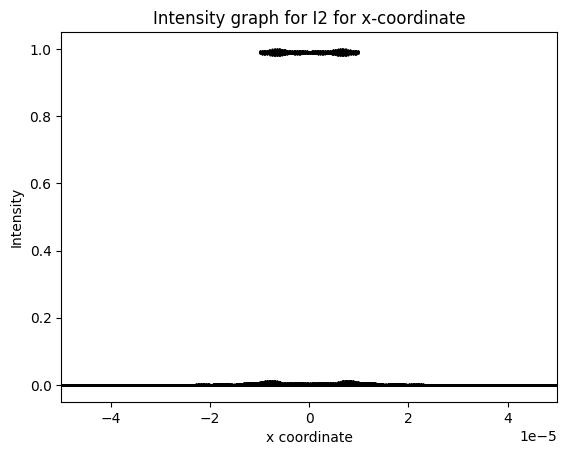

In [22]:
plt.plot(xv, I2_normalised, 'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity graph for I2 for x-coordinate")
plt.xlabel("x coordinate")
plt.ylabel("Intensity")
plt.xlim(-0.00005, 0.00005)

Text(0, 0.5, 'Intensity')

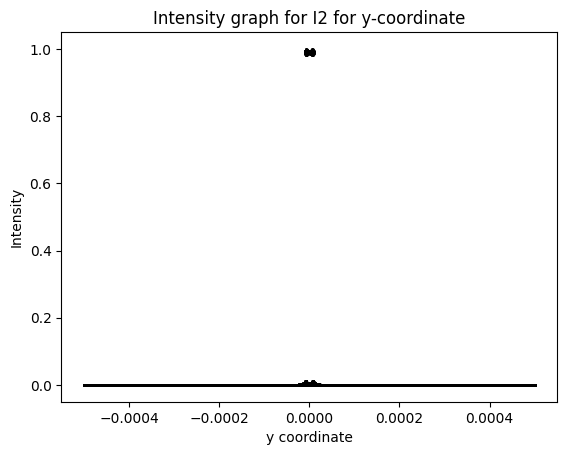

In [23]:
plt.plot(yv, I2_normalised, 'ko', markersize = 0.5, ls = 'none')
plt.title("Intensity graph for I2 for y-coordinate")
plt.xlabel("y coordinate")
plt.ylabel("Intensity")

**Notes:**

The Huygens-Fresnel principle is
$$u_1(x_1, y_1) = \int \int^\infty_{-\infty} u_0(x_0, y_0) \frac{z_{01}}{j\lambda r_{01}} \frac{e^{jkr_{01}}}{r_{01}} dx_0 dy_0$$
where
$$r_{01} = \sqrt{(x_1 - x_0)^2 + (y_1 - y0)^2 + (z_1 - z_0)^2}$$

Due to exponent being nonlinear, it is difficult to computate. As such, when in Fraunhofer zone, we can approximate it as
$$u(x_1, y_1) = \frac{e^{jkz_{01}}}{j\lambda z_{01}} \exp(j\frac{\pi}{\lambda z_{12}}(x_1^2 + y_1^2)) \int \int^\infty_{-\infty} u_0(x_0, y_0)e^{-j\pi(x_1 \xi + y_1 \eta)} dx_0 dy_0$$
where $\xi = \frac{x_1}{\lambda z_{01}}$ and $\eta = \frac{y_1}{\lambda z_{01}}$
 The intensity is
 $$I(x_1,y_1) = \left(\frac{1}{\lambda z_{01}}\right)^2 |F(u(x_0,y_0))|^2$$

A lens applies transformation:
$$t_{lens}(\textbf{r}) = A \exp(-\frac{i\pi r^2}{\lambda f}) t_{ap}(\textbf{r})$$
with complex constant $A$.

When $A = 1$, with $z = -f$ to $z=+f$,
$$u_2(\textbf{r}_2) = \frac{e^{ik2f}}{i\lambda f} F(u_1(\textbf{r}_1))|_{\textbf{p}=\frac{\textbf{r}_f}{\lambda f}} = \frac{e^{ik2f}}{i\lambda f} U_1(\frac{\textbf{r}_2}{\lambda f}).$$

The object's Fourier domain can be modified by placing filter at $z = z_2$:
$$u_2(\textbf{r}_2)=\frac{e^{ik2f}}{i\lambda f} U_1(\frac{\textbf{r}_2}{\lambda f})t_{filter}(\textbf{r}_2).$$


In order to normalise the intensity, we use the formula
$$I_{normalised} = \frac{I - \text{min}(I)}{\text{range}(I)}.$$

We can simulate a 4f optical system by:
1. Establishing shape of object.
2. Propagate the beam through the first lens and use Fourier transform.
3. Propagate the beam through space using transfer function.
4. Propogate beam through second lens and use inverse Fourier transform.
5. Visualise image.